In [2]:
import numpy as np
import corner
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import integrate
from scipy.stats import multivariate_t

In [171]:
df=3
sig1 = 2
sig2 = 3
correl = sig1*sig2*0.8
matrix=np.array([[sig1**2,correl],[correl,sig2**2]])
center=np.array([1,1])
Student_t = multivariate_t(df=df, shape=matrix, loc=center)

In [172]:
def student_t(X):

    return Student_t.pdf(X)

In [173]:

# Define the grid of points
x0 = np.linspace(-20, 25, 200)
y0 = np.linspace(-20, 25, 200)
X, Y = np.meshgrid(x0, y0)

pos = np.dstack((X, Y))
# pos = np.dstack((x0, y0))

In [174]:
# Compute the probability density function (PDF) of the multivariate t-distribution for each point
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = student_t(pos[i, j])

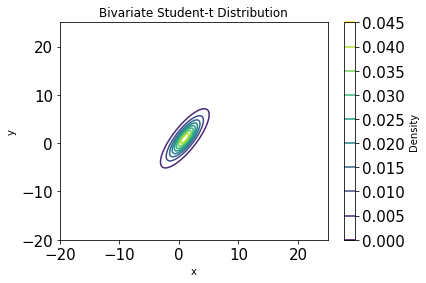

In [175]:



plt.contour(X, Y, Z,levels=10)


plt.xlabel('x')
plt.ylabel('y')
plt.title('Bivariate Student-t Distribution')
plt.colorbar(label='Density')
plt.show()


In [176]:
def MCMCSampling(distr,sigma,num_iterations):

    #thermalizing
    burn_samples=10000
    # Set the initial state of the chain
    x_current, y_current = 1.0, 1.0

    # Set the standard deviation of the proposal distribution
#     sigma = 1.0

    # Set the number of iterations to run

#     num_iterations = 10000

    # Create empty lists to store the samples
    x_samples = []
    y_samples = []

    
    acceptance_times=0
    
    # Run the Metropolis-Hastings algorithm
    for i in range(burn_samples):
        # Propose a new state for the chain
        x_proposed = np.random.normal(x_current, sigma)
        y_proposed = np.random.normal(y_current, sigma)

        # Calculate the acceptance probability
        acceptance_prob = min(1, distr(x_proposed, y_proposed) / distr(x_current, y_current))

        # Accept or reject the proposal
        if np.random.uniform() < acceptance_prob:
            x_current, y_current = x_proposed, y_proposed
#             acceptance_times=acceptance_times+1

      
        
        
        
        
    for i in range(num_iterations):
        # Propose a new state for the chain
        x_proposed = np.random.normal(x_current, sigma)
        y_proposed = np.random.normal(y_current, sigma)

        # Calculate the acceptance probability
        acceptance_prob = min(1, distr(x_proposed, y_proposed) / distr(x_current, y_current))

        # Accept or reject the proposal
        if np.random.uniform() < acceptance_prob:
            x_current, y_current = x_proposed, y_proposed
            acceptance_times=acceptance_times+1

        # Store the current state as a sample
        x_samples.append(x_current)
        y_samples.append(y_current)   
        
        
#     skips=20 
#     obs_val=[]   
#     for j in range(int(len(x_samples)/skips)):
#         obs_val.append(R2(x_samples[j],y_samples[j]))
    
    
    
    
    
    print(acceptance_times/num_iterations*100,"%")
    
    return(np.array([x_samples,y_samples]),acceptance_times/num_iterations*100)

In [177]:
bounds_new=[[-20,25],
            [-20,25]]

In [178]:
def student_t_2input(x1,x2):

    return Student_t.pdf([x1,x2])

In [179]:

# Perform the double integration
Normalization_Student, error = integrate.dblquad(student_t_2input, bounds_new[0][0], bounds_new[0][1], bounds_new[1][0], bounds_new[1][1])

In [180]:
Normalization_Student

0.994661816933775

In [181]:
def x1_val(x1,x2):
    return 1/Normalization_Student*student_t_2input(x1,x2)*x1

In [182]:
def x2_val(x1,x2):
    return 1/Normalization_Student*student_t_2input(x1,x2)*x2

In [183]:
x1_mean, error = integrate.dblquad(x1_val, bounds_new[0][0], bounds_new[0][1], bounds_new[1][0], bounds_new[1][1])

In [184]:
x2_mean, error = integrate.dblquad(x2_val, bounds_new[0][0], bounds_new[0][1], bounds_new[1][0], bounds_new[1][1])

In [185]:
%%time
MCMCRes=MCMCSampling(student_t_2input,2.5,500000)

44.6994 %
CPU times: user 8.73 s, sys: 0 ns, total: 8.73 s
Wall time: 8.66 s


In [186]:

    
figure = corner.corner(MCMCRes[0].T,range=bounds_new,
    labels=['$x_1$','$x_2$'],
    labelpad=0.2,
                       bins=100,
    label_kwargs={"fontsize":30},
                      hist_kwargs= {"linewidth":3},
    quantiles=None,
                       truths=[x1_mean,x2_mean], truth_color='r'
                       ,
    smooth=(1.7)
                       ,
    smooth1d=1.0
                      )





width = 8
height = 6
figure.set_size_inches(width, height)
plt.rc('xtick', labelsize=15)    
plt.rc('ytick', labelsize=15)

